**1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_w = data.resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [6]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


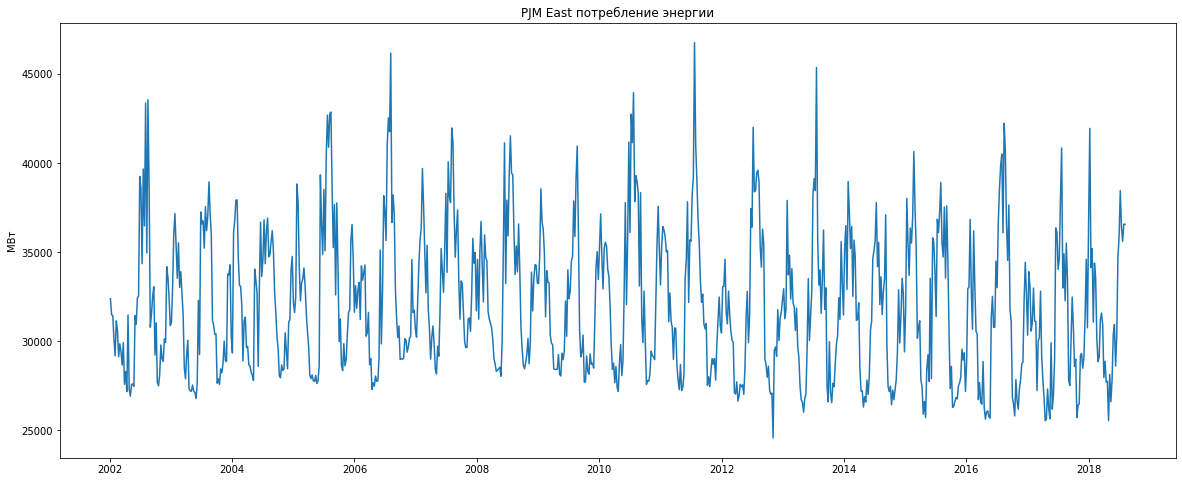

In [4]:
plt.figure(figsize = (20,8))
plt.plot(data_w['PJME_MW'])
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

**2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .**

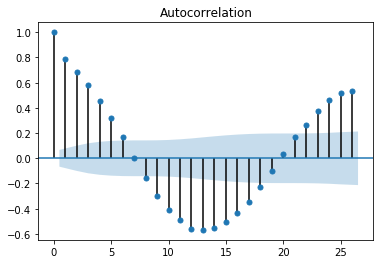

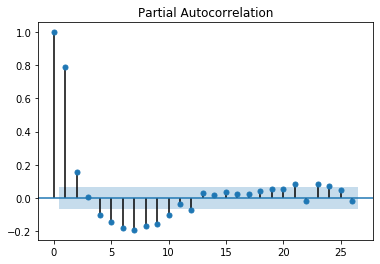

In [5]:
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=26)
plt.show()

In [14]:
# делим временной ряд на train и test
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

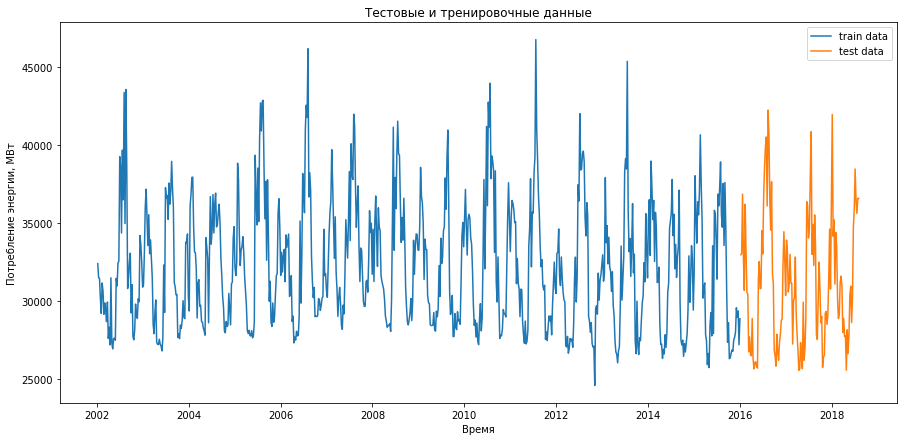

In [16]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [31]:
train['PJME_MW'].shape

(731,)

In [20]:
X_train = train.iloc[:-1,:]
y_train = train[data_w.columns[0]].values[1:]
X_test = test.iloc[:-1,:]
y_test = test[data_w.columns[0]].values[1:]

In [54]:
model = ARIMA(train['PJME_MW'], order=(6, 1, 0))
model_fit = model.fit(disp=False)
preds = model_fit.forecast(steps = 4)

In [59]:
preds #почему здесь каких то 3 ряда??

(array([28595.37496811, 28545.30603372, 28515.82280698, 28506.62455346]),
 array([2435.29227714, 3004.61625959, 3518.20199848, 4042.96190426]),
 array([[23822.28981308, 33368.46012313],
        [22656.36637756, 34434.24568988],
        [21620.27359962, 35411.37201435],
        [20582.56483023, 36430.68427668]]))

In [58]:
#['PJME_MW', 'dayofweek', 'pca2', 'diff1_l', 'd_w7', 'exp_0_07',  'exp_0_08']
X_test_100 = X_test.copy()
y_test_100 = preds[0].copy()
N10 = 10
p=7  # что такое p ?
for i in range(N10):
    y_test_100[i] = model_fit.forecast(X_test_100[i,:].reshape((1,7)))
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    X_test_100[i+1,6] = X_test_100[i+1,0]*(1-0.08)+ 0.08 * X_test_100[i,6] 
    X_test_100[i+1,5] = X_test_100[i+1,0]*(1-0.07)+ 0.07 * X_test_100[i,5] 
    if i>p:
        X_test_100[i+1,4] = np.mean(X_test_100[i+1-p:i+1,0]) 
    #X_test_100[i+1,3] = 0 #np.log( scl_target.inverse_transform(y_test_100[i:i+1]))
        
    
    
plt.figure( figsize=(15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

TypeError: '(0, slice(None, None, None))' is an invalid key

In [ ]:
plt.figure(figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()